In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import random

In [43]:
categories = os.listdir("./images")

In [44]:
dic = {
    'cats':0,'dogs':1,'horses':2,'humans':3
}
X = []
y = []

In [45]:
for c in categories:
    if "." not in c:
        cd  = os.listdir("./images/"+c)
        for ix in cd:
            img = plt.imread("./images/"+c+"/" +ix)
            img = cv2.resize(img,(32,32))
            X.append(img)
            y.append(dic[c])

In [46]:
len(X)

808

In [47]:
X = np.array(X)

In [48]:
X.shape

(808, 32, 32, 3)

In [49]:
X = X.reshape(808,-1)

In [50]:
X.shape

(808, 3072)

In [51]:
y= np.array(y)

In [52]:
X.shape

(808, 3072)

In [53]:
y.shape

(808,)

In [54]:
data = np.hstack((X,y.reshape(808,-1)))

In [55]:
data.shape

(808, 3073)

In [56]:
np.random.shuffle(data)

In [57]:
data[:,-1]

array([3, 1, 1, 1, 3, 1, 2, 0, 2, 3, 3, 1, 1, 1, 2, 0, 3, 0, 3, 0, 3, 0,
       0, 2, 0, 1, 0, 1, 2, 1, 1, 3, 0, 0, 3, 1, 0, 3, 0, 2, 3, 1, 0, 1,
       3, 0, 3, 1, 3, 1, 1, 2, 3, 0, 1, 0, 3, 1, 1, 0, 1, 1, 3, 2, 2, 2,
       0, 3, 0, 1, 2, 0, 1, 3, 2, 2, 1, 3, 1, 1, 3, 3, 0, 3, 1, 0, 3, 2,
       1, 0, 0, 2, 2, 2, 1, 1, 2, 3, 1, 3, 2, 3, 2, 3, 2, 0, 0, 1, 1, 1,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 3, 2, 1, 1, 3, 3, 1, 3, 1,
       3, 0, 0, 3, 3, 1, 2, 2, 2, 0, 2, 3, 1, 3, 1, 0, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 2, 2, 2, 1, 2, 3, 3, 0, 3, 1, 3, 2, 3, 1, 0, 0, 1, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 3, 0, 1, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0,
       3, 0, 0, 2, 2, 1, 0, 0, 3, 1, 3, 3, 2, 1, 2, 1, 1, 2, 2, 2, 1, 3,
       2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 3, 3, 1, 1, 2, 2, 0, 3, 1,
       1, 1, 3, 2, 1, 1, 0, 0, 1, 3, 3, 3, 0, 1, 2, 3, 0, 3, 3, 3, 0, 0,
       3, 2, 3, 3, 3, 2, 3, 0, 2, 2, 1, 0, 0, 3, 3, 1, 0, 0, 1, 1, 0, 2,
       0, 2, 2, 2, 0, 1, 3, 0, 2, 0, 0, 1, 3, 2, 2,

In [58]:
X= data[:,:-1]
y = data[:,-1]

In [59]:
X.shape

(808, 3072)

In [60]:
y.shape

(808,)

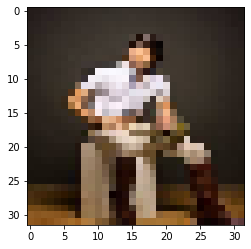

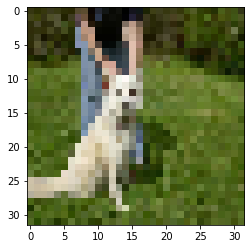

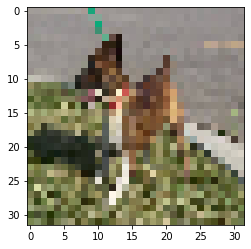

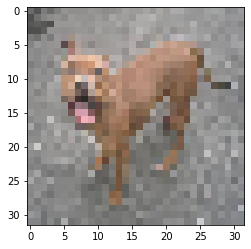

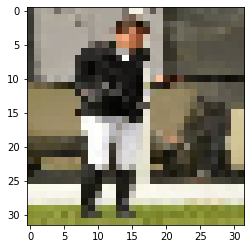

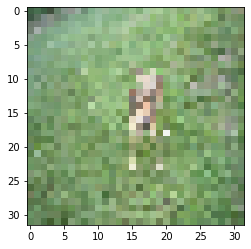

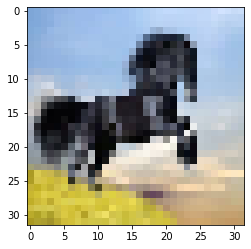

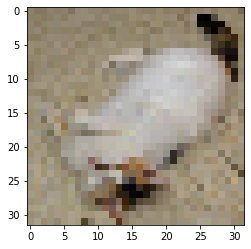

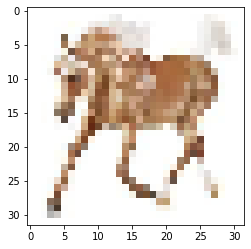

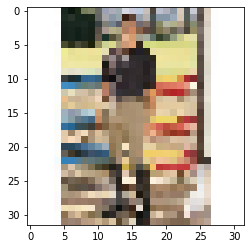

In [61]:
for i in range(10):
    plt.imshow(X[i].reshape((32,32,3)))
    plt.show()

In [102]:
class SVM():
    def __init__(self, C = 1.0):
        self.W = 0.0
        self.b = 0.0
        self.C = C
        
    def hinge_loss(self, W, b, X, y ):
        loss = 0.0
        
        loss += 0.5 * np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = y[i]*(np.dot(W, X[i].T) + b )
            loss += self.C * ( max(0, (1- ti)) )
        
        return loss[0][0]
    
    
    def fit(self, X, y, lr = 0.00001, max_itr = 700):
    
        n = X.shape[1]
        m = X.shape[0]
        
        W = np.zeros((1,n))
        b = 0.0
        
        
        losses = []
        
        for p in range(max_itr):
            
            l = self.hinge_loss(W,b,X,y)
            losses.append(l)
            
            gradw = np.zeros((1,n))
            gradb = 0
            
            gradw += 0.5*W
            
            for i in range(m):
                ti = y[i]*(np.dot(W, X[i].T) + b )
                if (ti>=1):
                    gradw +=0
                    gradb +=0
                else:
                    gradw -= self.C*y[i]*X[i]
                    gradb -= self.C*y[i]
        
            W = W - lr*gradw
            b = b - lr*gradb
        self.W = W
        self.b = b
        
        return W, b, losses

In [103]:
M = X.shape[0]
CLASSES = len(np.unique(y))

In [104]:
def classWiseData(X,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(X.shape[0]):
        data[y[i]].append(X[i])
        
    for k in data:
        data[k] =  np.array(data[k])
        
    return data
    

In [105]:
data = classWiseData(X,y)

In [106]:
data[2]

array([[126, 166, 215, ..., 191, 154, 101],
       [255, 255, 255, ..., 255, 255, 255],
       [150, 139,  92, ...,  66,  60,  61],
       ...,
       [194, 200, 217, ...,  51,  47,  38],
       [253, 253, 253, ..., 156, 143,  79],
       [255, 255, 255, ..., 255, 255, 255]])

In [107]:
def getPairWiseForSVM(d1,d2):
    l1,l2 = d1.shape[0],d2.shape[0]
    samples = l1+l2
    features = d1.shape[1]
    
    data_pairs = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pairs[:l1,:] = d1
    data_pairs[l1:,:] = d2
    
    data_labels[:l1]= -1
    data_labels[l1:] = 1
    
    return data_pairs,data_labels
    

In [108]:
d,l = getPairWiseForSVM(data[0],data[1])

In [109]:
mySVM = SVM()
w,b,losses = mySVM.fit(d,l)

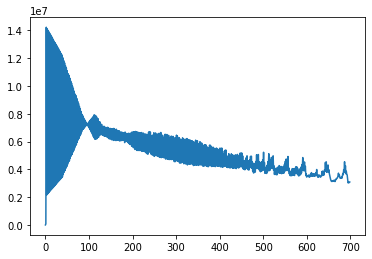

In [110]:
plt.plot(losses)

In [111]:
def trainSVM(X,y):
    svm_classifiers = {}
    
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        
        for j in range(i+1,CLASSES):
            xpair,ypair = getPairWiseForSVM(data[i],data[j])
            
            w,b,l = mySVM.fit(xpair,ypair)
            
            svm_classifiers[i][j] = [w,b]
            
            plt.plot(l)
            plt.show()
            
    return svm_classifiers

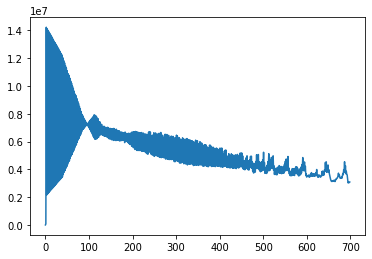

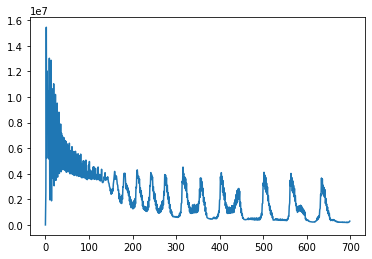

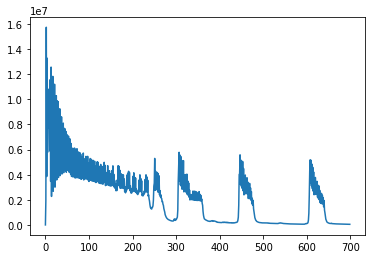

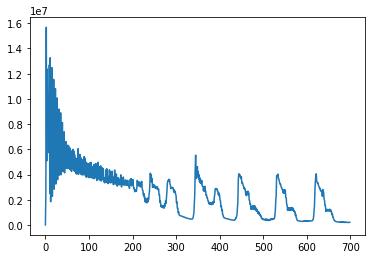

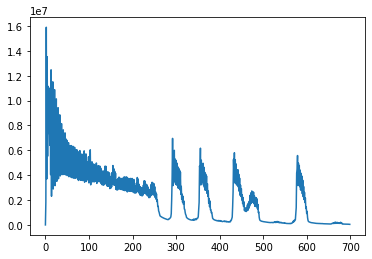

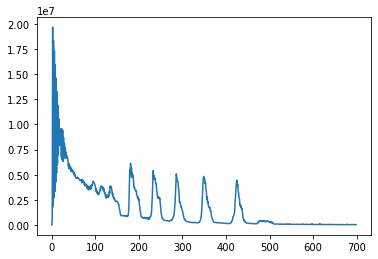

In [112]:
svm_classifiers = trainSVM(X,y)

In [113]:
svm_classifiers[2]

{3: [array([[3.48832631, 2.8515481 , 2.36856481, ..., 1.90239882, 2.21049725,
          3.60620827]]), 0.035240000000000035]}

In [114]:
def binaryPredict(x,w,b):
    
    x = np.reshape(x,(1,-1))
    w = np.reshape(w,(1,-1))
    
    z = np.dot(w,x.T) + b
    if z>=0:
        return 1
    else:
        return -1
        

In [115]:
def predict(x):
    
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            z =  binaryPredict(x,w,b)
            
            if z==1:
                count[j] += 1
            else : 
                count[i] += 1
    final_pred = np.argmax(count)
    return final_pred

In [127]:
predict(X[234])

3

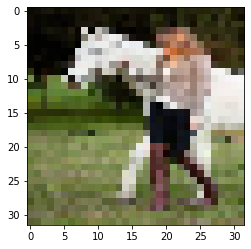

In [128]:
plt.imshow(X[234].reshape((32,32,3)))

In [130]:
from sklearn.svm import SVC

In [119]:
model = SVC(kernel="linear",C = 0.01)

In [120]:
model.fit(X,y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
model.score(X,y)

1.0

In [122]:
def accuracy(X,y):
    y_pred=  []
    for i in range(X.shape[0]):
        p = predict(X[i])
        y_pred.append(int(p))
        
    y_pred = np.array(y_pred)
    acc = (y_pred == y).sum()/y.shape[0]
    return acc

In [123]:
accuracy(X,y)

0.7586633663366337